In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False , download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [2]:
# this is for the general NN
import torch.nn as nn
# this is for specific functionality we are probably going to use
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    def __init__(self):
        # leaving out the super will trigger error !!!
        super().__init__()
        # 28*28 - flatened picture size for the input
        # 64 - the chosen output (could be any number really)
        self.fc1 = nn.Linear((28*28), 64)
        # for each next fc, the input must be the same as the last output
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        # the last one is going to have ouput 10, because we are guessing number from 0-9
        self.fc4 = nn.Linear(64, 10)
        
    # we define our network as feed forward!    
    def forward(self, x):
        # relu() - rectify lienar - activation function, decides wether the neuron is fired
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # because the relu() runs on the output layer we do not want to run it on the
        # last layer
        x = self.fc4(x)
        # no explanation for dim=1, just always use it
        return F.log_softmax(x, dim=1)
        
        
net = Net()
# we can look at our NN, because there is an inbuilt function for print
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [4]:
X = torch.rand((28,28))
# it is very important to format things EXACTLY like these libraries want them!
# -1 - specefies that the input will be of an unknown shape
X = X.view(-1, 28*28)
output = net(X)
output

tensor([[-2.4074, -2.3045, -2.2683, -2.4728, -2.2513, -2.4098, -2.2769, -2.1411,
         -2.2396, -2.2966]], grad_fn=<LogSoftmaxBackward>)

In [6]:
import torch.optim as optim

# net.parameters() - contains all the variables of the net that we can change/adjust
# lr - learning rate - this corresponds to the way we decide if some output is correct, 
# where we can use a mathematical formula to check how much off we are and correct our
# weight in such a way that it's going to be correct. But the problem with correcting each
# perfectly is that we lose the overall (general) solution to the problem we are solving
# and this is called overfitting. So the learning rate is in place here to tell our NN
# by how much it should correct itself, which directly corresponds to how fast it learns.
optimizer = optim.Adam(net.parameters(), lr=0.001)

# A whole pass through our data is called an EPOCH
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        # printing the image 
        #print(X[0])
        # printing the corresponding number
        #print(y[0])
        #break
        # Everytime befor you pass data trough your NN
        net.zero_grad()
        # We batch our data because: 
        # 1.) It decreases training time (it's faster to train in baches)
        # 2.) Between 32-128 of batch sizze helps generalizing
        output = net(X.view(-1, 28*28))
        # now we calculate how wrong are we
        # nll_loss - if our data is a scalar
        # mse_loss??? - if our data is a one hot vector [0, 1, 0, 0, 0]
        loss = F.nll_loss(output, y)
        # we backpropagate our loss
        loss.backward()
        # adjusts the weights for us
        optimizer.step()
    print(loss)
    # what we actually want to see at this point is accuarcy.
        
        

tensor(0.0119, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)
tensor(0.0214, grad_fn=<NllLossBackward>)


In [8]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuarcy: ", round(correct/total, 3))

Accuarcy:  0.982


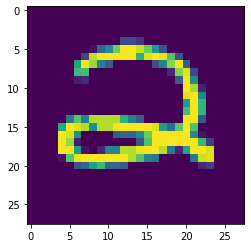

tensor(2)


In [14]:
import matplotlib.pyplot as plt
predict_num = 3
plt.imshow(X[predict_num].view(28,28))
plt.show()
print(torch.argmax(net(X[predict_num].view(-1, 784))[0]))